# メビウス関数

平方数で割り切れる場合0、平方数で割り切れない場合異なる$k$個の素数で割り切れた場合$(-1)^k$となる関数。

In [1]:
import numpy as np
    
def mobius(n):
    divisor=2
    factors=[]
    if n==1:
        return 1
    while divisor<=int(n**0.5)+1:
        if n%divisor==0:
            n//=divisor
            factors.append(divisor)
            if n%divisor==0:
                return 0
        else:
            divisor+=1
            is_square=1
    if len(factors)==0:
        factors.append(n)
    elif n!=1:
        factors.append(n)
    return (-1)**len(factors)

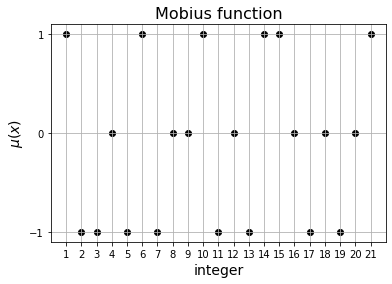

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N_max = 21
x = np.arange(1,N_max+1)
y = np.array([mobius(i) for i in range(1,N_max+1)])
plt.scatter(x,y,color='black')

plt.title('Mobius function',size=16)#title
plt.xlabel('integer',size=14)#x軸ラベル
plt.ylabel('$\mu(x)$',size=14)#y軸ラベル
plt.grid()
plt.xticks([i for i in range(1,N_max+1)])
plt.yticks([-1,0,1])


plt.show()#おまじない

## 参考　素因数分解のコード
以下は、$2,..,[\sqrt{n}]$までの整数$i$で$n$が割り切れないかどうかを確認するコード。`n=n/i`で$n$を更新し続ける。プログラム終了時($i=\sqrt n$となるとき)には、$n$は1または素数であることを示すことができるので、$2,..,[\sqrt{n}]$までの整数で割り切れるかを確認することで全ての素因数を求めることができ、素因数分解を行うことが可能である。

メビウス関数は以下の素因数分解のコードを、$n$が平方数で割り切れることが判明したら0を出力する機能をつけた。

### 計算コスト
計算コストは$\sqrt{n}$である。
> エラトステネスの篩などを使い$\sqrt{n}$までの素数をリストアップしておけば指数加速をさせることができる。しかし、エラトステネスの篩を使って計算する際に$O(n)$の配列の準備や、$\sqrt{n}$の整数に対して素数判定を行わないといけないため、１回の素因数分解のコードに実装することは不向きだと考えられる。あくまで、素因数分解を複数回実行する際に有用である。

In [3]:
def factorization(n):
    divisor=2
    factors=[]
    while divisor<=int(n**0.5)+1:
        if n%divisor==0:
            n//=divisor
            factors.append(divisor)
            if n==1:
                break
        else:
            divisor+=1
    if len(factors)==0:
        return ([n])
    elif n!=1:
        factors.append(n)
        return factors

def CountFactors(N):
    if N==1:
        return [[1,0]]
    else:
        listfactors=factorization(N)
        listfactors.append(0)
        count=[]
        for i in range(len(listfactors)-1):
            if listfactors[i]==listfactors[i-1]:
                count[-1][1]+=1
            else:
                count.append([listfactors[i],1])
        return (count)

In [4]:
factorization(8)

# エラトステネスの篩を使った実装
エラトステネスの篩を使って計算する際に$O(n)$の配列の準備や、$\sqrt{n}$の整数に対して素数判定を行うので素因数分解のコードに実装しても指数加速は行われなさそうである。

In [5]:
import time
import gc

def time_measure(obj,*args,**kwargs):
    t0 = time.perf_counter()
    obj(*args,**kwargs)
    t1 = time.perf_counter()
    del obj
    gc.collect()
    return t1-t0

In [6]:
def eratosthenes(n:int)->list:
    """
    retruns prime less than n
    """
    PrimeJudge = np.ones(n+1)
    PrimeJudge[0] = False
    PrimeJudge[1] = False
    for i in range(2,int(n**0.5)+1):
        if not PrimeJudge[i]:
            continue
        for j in range(i*2,n+1,i):
            PrimeJudge[j] = False
    return np.array([i for i in range(n+1) if PrimeJudge[i]])

def mobius_eratosthenes(n):
    prime_list = eratosthenes(int(n**0.5)+1)
    factors=[]
    for divisor in prime_list:
        if n%divisor==0:
            n//=divisor
            factors.append(divisor)
            if n%divisor==0:
                return 0
        else:
            divisor+=1
            is_square=1
    if len(factors)==0:
        factors.append(n)
    elif n!=1:
        factors.append(n)
    return (-1)**len(factors)

for i in range(1,10):
    print(time_measure(mobius_eratosthenes,i)<time_measure(mobius,i))

False
False
False
False
False
False
False
False
False


In [7]:
prime_10000 = eratosthenes(10000)

def mobius_eratosthenes_rev(n):
    prime_list = prime_100
    factors=[]
    for divisor in prime_list:
        if n%divisor==0:
            n//=divisor
            factors.append(divisor)
            if n%divisor==0:
                return 0
        else:
            divisor+=1
            is_square=1
    if len(factors)==0:
        factors.append(n)
    elif n!=1:
        factors.append(n)
    return (-1)**len(factors)

for i in range(99000000,99000020):
    print(i,time_measure(mobius_eratosthenes,i)<time_measure(mobius,i))

99000000 False
99000001 False
99000002 False
99000003 False
99000004 False
99000005 False
99000006 False
99000007 False
99000008 False
99000009 False
99000010 False
99000011 False
99000012 False
99000013 False
99000014 False
99000015 False
99000016 False
99000017 False
99000018 False
99000019 False
